In [1]:
import os
import xarray as xr
import numpy as np
import datetime as dt
# Instalar Basemap con conda, no pip (si no está disponible)
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Parameters: date and hour (00, 06, 12 or 18). The GFS model has a spatial resolution of 0.25 degrees and a temporal resolution of 1 hour

In [2]:
var = 'ugrd10m' # u component of wind speed
lat = (-90, 90)
lon = (0, 360)

Slice variable, lat-lon region and first hour, in this example temperature at 2m at 2020-05-04 00 UTC. Then, transform to numpy arrays

In [3]:
with xr.open_dataset("20210608_06_08.nc") as ds:
    da = ds[var].sel(lat = slice(*lat), lon = slice(*lon))
    
    lons = da.lon.data
    lats = da.lat.data
    data = da.data

<ipython-input-4-36bccca95295>:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=180)


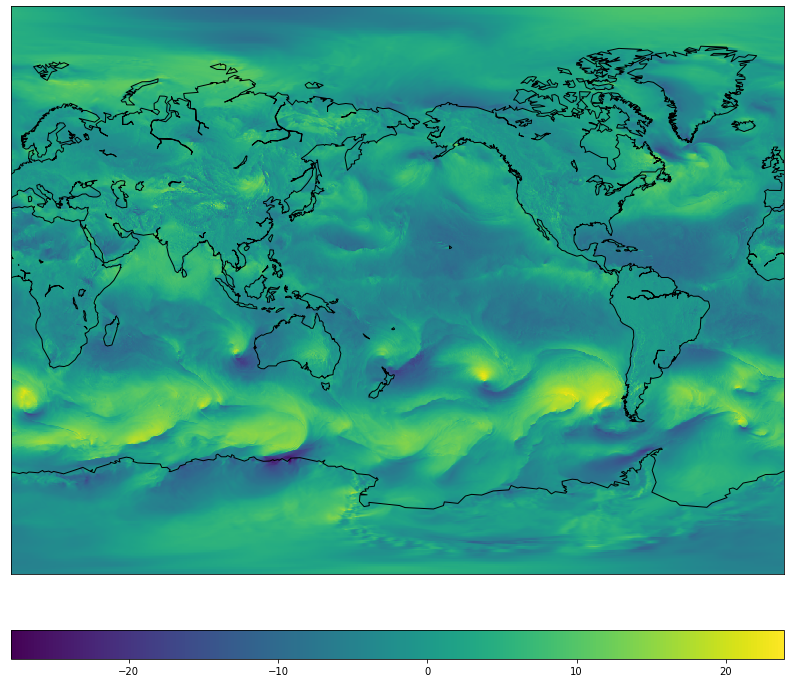

In [4]:
plt.figure(figsize=(20, 12))
m = Basemap(projection='mill', lon_0=180)

# plot coastlines
m.drawcoastlines()

# map lon-lat to map coordinates
lon2d, lat2d = np.meshgrid(lons, lats)
x, y = m(lon2d, lat2d)

# plot color scale
cs = m.pcolor(x, y, np.squeeze(data))
cbar = m.colorbar(cs, location='bottom', pad="10%")

[](http://150.244.222.212:8892/voila/render/get_gfs.ipynb)